In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
data = pd.read_stata("/Users/mitishah/Downloads/learning_out_ped_clean.dta")
data.head()

,country,teach_version,nb_girls,nb_boys,m8ssbq1_ses,m8ssbq2_ses,m8ssbq3_ses,m8ssbq4_ses,m8ssbq5_ses,student_age,...,z_av_b6,z_av_c7,z_av_c8,z_av_c9,z_socio_emotional_skills1,z_classroom_culture1,z_instruction1,z_timeontask2,z_teach_score1,z_teach_score_square
0,Ethiopia,Second (newest),13.0,12.0,NaN,NaN,0.0,0.0,NaN,10.0,...,0.510497,0.198856,0.587882,0.621455,0.558071,0.276889,1.299989,-0.371619,0.888448,0.789340
1,Ethiopia,Second (newest),17.0,12.0,Yes,5.0,3.0,2.0,Pit,10.0,...,-0.124110,0.198856,-0.265513,-0.810342,-0.334518,-0.595456,-0.432046,0.668260,-0.546501,0.298664
2,Ethiopia,Second (newest),17.0,12.0,NaN,4.0,3.0,5.0,Communal Bathroom,10.0,...,-0.124110,0.198856,-0.265513,-0.810342,-0.334518,-0.595456,-0.432046,0.668260,-0.546501,0.298664
3,Ethiopia,Second (newest),17.0,12.0,No,4.0,3.0,2.0,Pit,11.0,...,-0.124110,0.198856,-0.265513,-0.810342,-0.334518,-0.595456,-0.432046,0.668260,-0.546501,0.298664
4,Ethiopia,Second (newest),17.0,12.0,NaN,9.0,3.0,1.0,Communal Bathroom,10.0,...,-0.124110,0.198856,-0.265513,-0.810342,-0.334518,-0.595456,-0.432046,0.668260,-0.546501,0.298664


                                                            
    
    
                                                                                                                 .

# Hierarchical Clustering For Pooled Data

Step 1: WSS Calculation for optimal distance threshold
<br>
Step 2: Plot the dendrogram using optimal distance threshold
<br>
Step 3: Print Cluster Labels

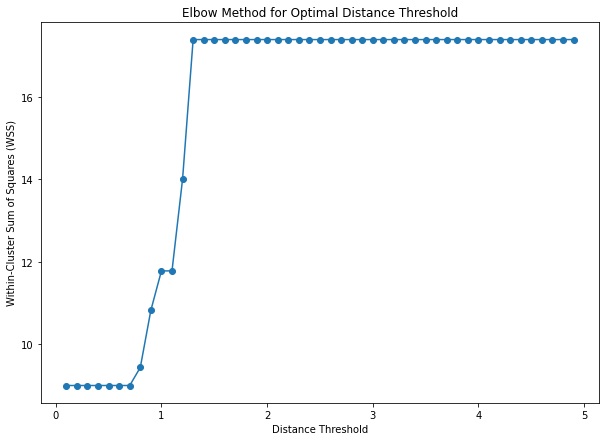

In [3]:
## WSS calculation for optimal distance threshold



# define columns to use for clustering
selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

x = data[selected_columns]

#calculate correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

# calculate WSS for different distance thresholds
wss = []
for i in np.arange(0.1, 5, 0.1):
    cluster_labels = fcluster(linkage_matrix, i, criterion='distance')
    wss.append(sum((corr.columns.to_series().groupby(cluster_labels).apply(lambda x: x.index.tolist())).apply(lambda x: corr.loc[x, x].values.flatten().tolist()).apply(lambda x: sum([abs(e)**2 for e in x]))))

# plot the WSS against different distance thresholds
plt.figure(figsize=(10, 7))
plt.plot(np.arange(0.1, 5, 0.1), wss, marker='o')
plt.title(f'Elbow Method for Optimal Distance Threshold')
plt.xlabel('Distance Threshold')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

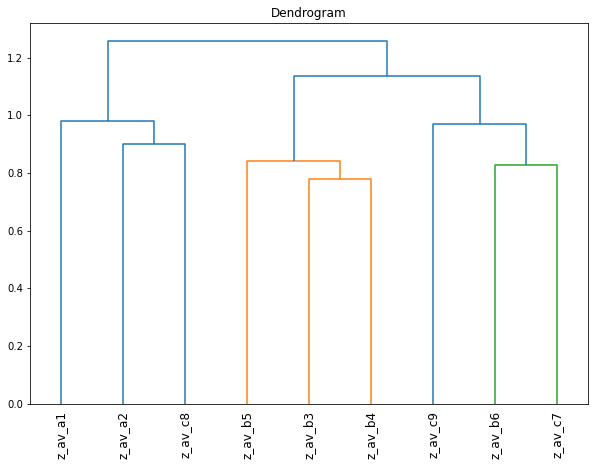

In [4]:
## Dendrogram for pooled data

#calculate correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

#plot a dendrogram of the clustering results
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
plt.show()

In [5]:
#choose the distance threshold to define the clusters
dist_threshold = 1

#assign cluster labels to each variable based on the distance threshold

cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

#print the cluster labels for each variable
for i, label in enumerate(cluster_labels):
    print(f"Variable {x.columns[i]} belongs to cluster {label}")

Variable z_av_a1 belongs to cluster 1
Variable z_av_a2 belongs to cluster 1
Variable z_av_b3 belongs to cluster 2
Variable z_av_b4 belongs to cluster 2
Variable z_av_b5 belongs to cluster 2
Variable z_av_b6 belongs to cluster 3
Variable z_av_c7 belongs to cluster 3
Variable z_av_c8 belongs to cluster 1
Variable z_av_c9 belongs to cluster 3


Variable z_av_a1 belongs to cluster 1 (supportive learning environment)
<br>
Variable z_av_a2 belongs to cluster 1 (positive behavioral expectations)
<br>
Variable z_av_c8 belongs to cluster 1 (perseverance)


Variable z_av_b3 belongs to cluster 2 (lesson facilitation)
<br>
Variable z_av_b4 belongs to cluster 2 (checks for undrstanding)
<br>
Variable z_av_b5 belongs to cluster 2 (feedback)


Variable z_av_b6 belongs to cluster 3 (critical thinking)
<br>
Variable z_av_c7 belongs to cluster 3 (autonomy)
<br>
Variable z_av_c9 belongs to cluster 3 (social and collaborative skills)



.

## Hierarchical Clustering For Pooled Data Using A Common Distance Threshold



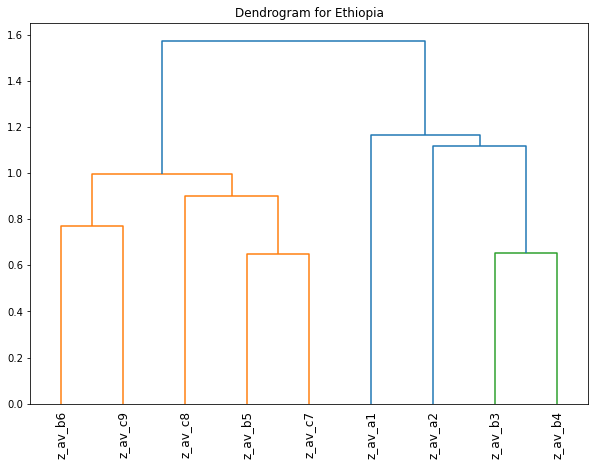

Variable z_av_a1 belongs to cluster 4 for Ethiopia
Variable z_av_a2 belongs to cluster 3 for Ethiopia
Variable z_av_b3 belongs to cluster 2 for Ethiopia
Variable z_av_b4 belongs to cluster 2 for Ethiopia
Variable z_av_b5 belongs to cluster 1 for Ethiopia
Variable z_av_b6 belongs to cluster 1 for Ethiopia
Variable z_av_c7 belongs to cluster 1 for Ethiopia
Variable z_av_c8 belongs to cluster 1 for Ethiopia
Variable z_av_c9 belongs to cluster 1 for Ethiopia


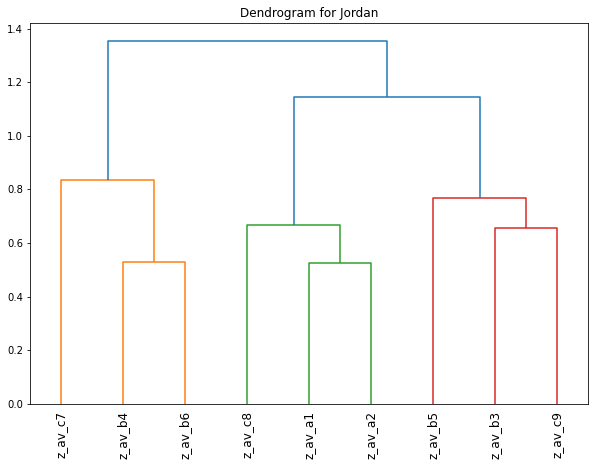

Variable z_av_a1 belongs to cluster 2 for Jordan
Variable z_av_a2 belongs to cluster 2 for Jordan
Variable z_av_b3 belongs to cluster 3 for Jordan
Variable z_av_b4 belongs to cluster 1 for Jordan
Variable z_av_b5 belongs to cluster 3 for Jordan
Variable z_av_b6 belongs to cluster 1 for Jordan
Variable z_av_c7 belongs to cluster 1 for Jordan
Variable z_av_c8 belongs to cluster 2 for Jordan
Variable z_av_c9 belongs to cluster 3 for Jordan


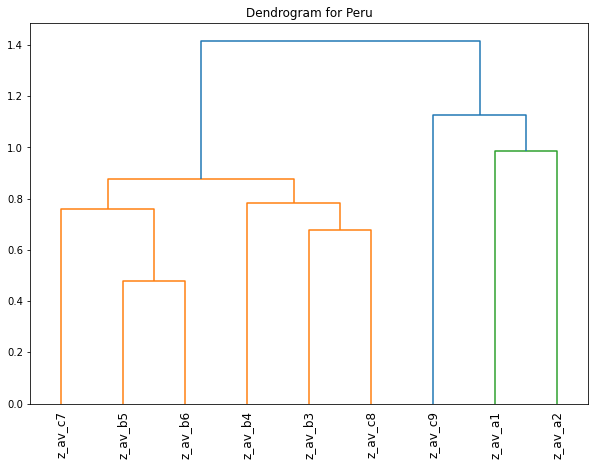

Variable z_av_a1 belongs to cluster 2 for Peru
Variable z_av_a2 belongs to cluster 2 for Peru
Variable z_av_b3 belongs to cluster 1 for Peru
Variable z_av_b4 belongs to cluster 1 for Peru
Variable z_av_b5 belongs to cluster 1 for Peru
Variable z_av_b6 belongs to cluster 1 for Peru
Variable z_av_c7 belongs to cluster 1 for Peru
Variable z_av_c8 belongs to cluster 1 for Peru
Variable z_av_c9 belongs to cluster 3 for Peru


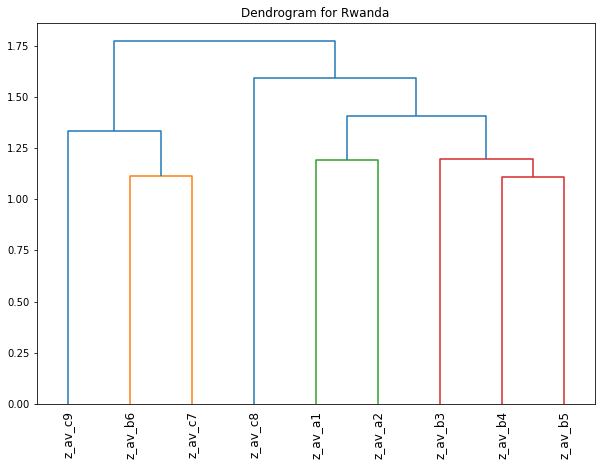

Variable z_av_a1 belongs to cluster 4 for Rwanda
Variable z_av_a2 belongs to cluster 5 for Rwanda
Variable z_av_b3 belongs to cluster 8 for Rwanda
Variable z_av_b4 belongs to cluster 6 for Rwanda
Variable z_av_b5 belongs to cluster 7 for Rwanda
Variable z_av_b6 belongs to cluster 1 for Rwanda
Variable z_av_c7 belongs to cluster 2 for Rwanda
Variable z_av_c8 belongs to cluster 9 for Rwanda
Variable z_av_c9 belongs to cluster 3 for Rwanda


In [6]:
# list the unique countries
countries = data['country'].unique()

# define columns to use for clustering
selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

# loop through each country and perform clustering
for country in countries:
    # subset the data for a country
    subset = data[data['country'] == country]
    
    # extract the columns to use for clustering
    x = subset[selected_columns]

    #calculate the correlation matrix
    corr = x.corr()

    #perform hierarchical clustering on the correlation matrix
    linkage_matrix = linkage(corr, "ward")

    #plot a dendrogram of the clustering results
    plt.figure(figsize=(10, 7))
    plt.title(f"Dendrogram for {country}")
    dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
    plt.show()

    #choose distance threshold to define the clusters
    dist_threshold = 1

    #assign cluster labels to each variable based on the distance threshold
    cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

    #print cluster labels for each variable
    for i, label in enumerate(cluster_labels):
        print(f"Variable {x.columns[i]} belongs to cluster {label} for {country}")





.

# ## Hierarchical Clustering For Unpooled Data Using Optimum Distance Threshold


Step 1: WSS Calculation for optimal distance threshold for each country
<br>
Step 2: Plot the dendrogram using optimal distance threshold for each country
<br>
Step 3: Print cluster labels for each country


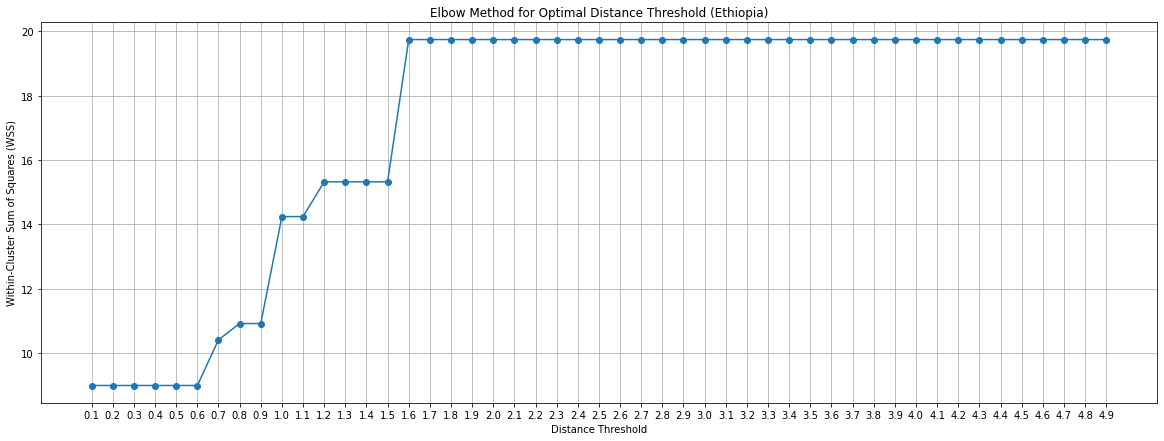

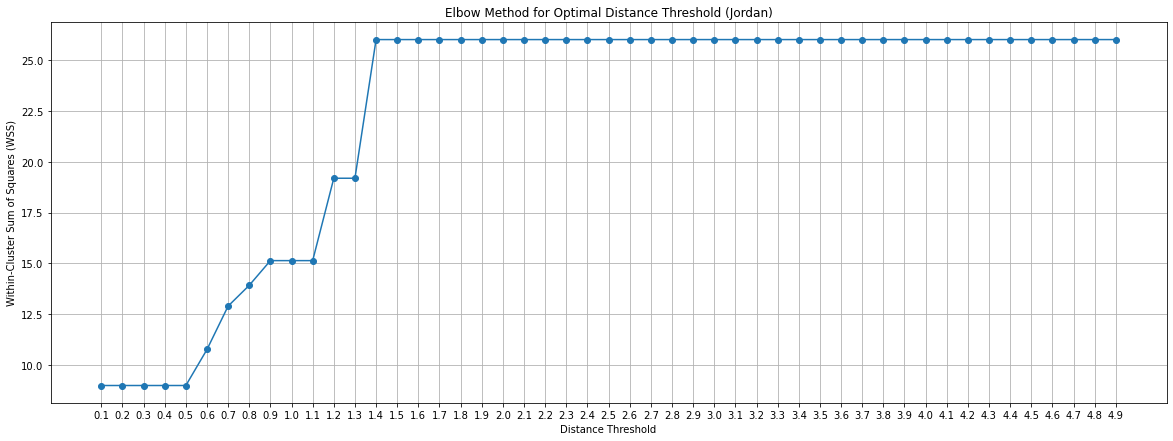

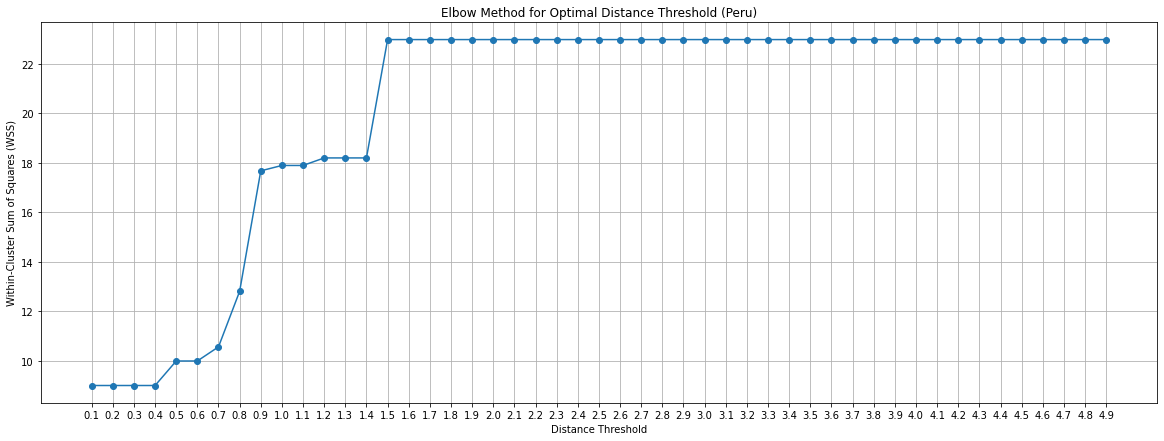

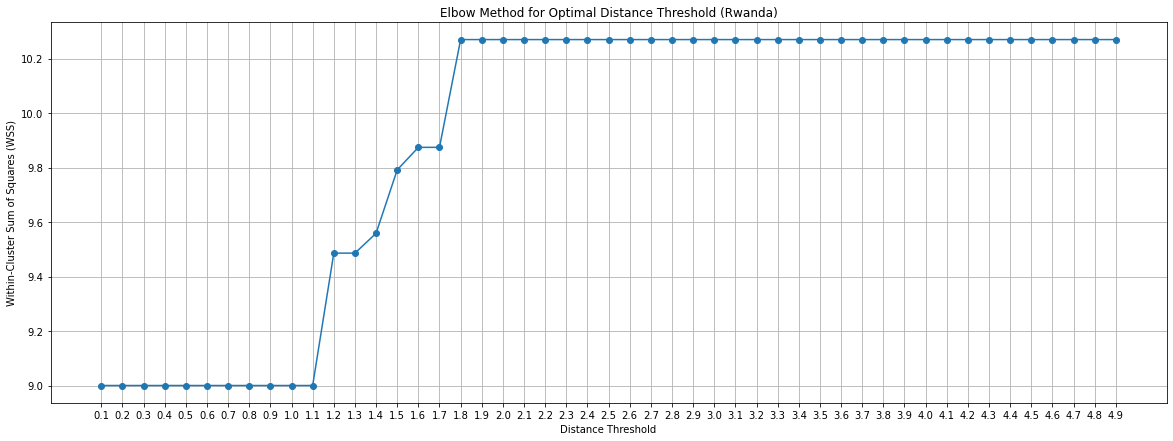

In [7]:
# define the columns to use for clustering
selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

# get the unique list of countries in the dataset
countries = data['country'].unique()

# loop through each country and calculate the WSS and plot the elbow plot
for country in countries:
    # subset the data for the current country
    country_data = data[data['country'] == country]
    
    # extract the columns to use for clustering
    x = country_data[selected_columns]

    #calculate the correlation matrix
    corr = x.corr()

    #perform hierarchical clustering on the correlation matrix
    linkage_matrix = linkage(corr, "ward")

    # calculate the within-cluster sum of squares (WSS) for different distance thresholds
    wss = []
    for i in np.arange(0.1, 5, 0.1):
        cluster_labels = fcluster(linkage_matrix, i, criterion='distance')
        wss.append(sum((corr.columns.to_series().groupby(cluster_labels).apply(lambda x: x.index.tolist())).apply(lambda x: corr.loc[x, x].values.flatten().tolist()).apply(lambda x: sum([abs(e)**2 for e in x]))))

    # plot the WSS against different distance thresholds
    plt.figure(figsize=(20, 7))
    plt.plot(np.arange(0.1, 5, 0.1), wss, marker='o')
    plt.title(f'Elbow Method for Optimal Distance Threshold ({country})')
    plt.xlabel('Distance Threshold')
    plt.ylabel('Within-Cluster Sum of Squares (WSS)')
    plt.xticks(np.arange(0.1, 5, 0.1))
    plt.grid(True)
    plt.show()


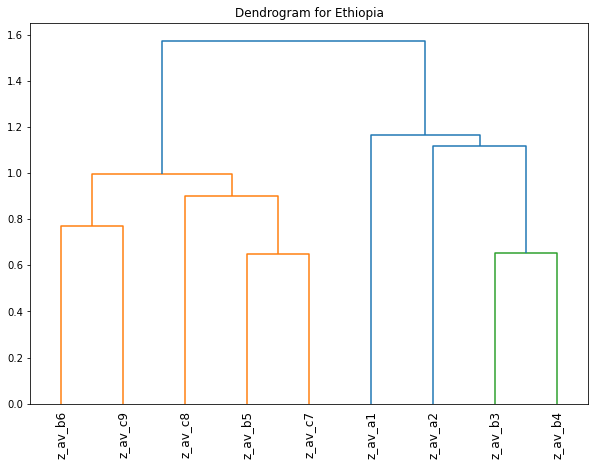

Variable z_av_a1 belongs to cluster 1 for Ethiopia
Variable z_av_a2 belongs to cluster 1 for Ethiopia
Variable z_av_b3 belongs to cluster 1 for Ethiopia
Variable z_av_b4 belongs to cluster 1 for Ethiopia
Variable z_av_b5 belongs to cluster 1 for Ethiopia
Variable z_av_b6 belongs to cluster 1 for Ethiopia
Variable z_av_c7 belongs to cluster 1 for Ethiopia
Variable z_av_c8 belongs to cluster 1 for Ethiopia
Variable z_av_c9 belongs to cluster 1 for Ethiopia


In [8]:
# define the columns to use for clustering
#selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

# subset the data for the Ethiopia
ethiopia_data = data[data['country'] == 'Ethiopia']

# extract the columns to use for clustering
x = ethiopia_data[selected_columns]

#calculate the correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

#plot a dendrogram of the clustering results
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Ethiopia")
dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
plt.show()

#choose the distance threshold to define the clusters
dist_threshold = 1.6

#assign cluster labels to each variable based on the distance threshold
cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

#print the cluster labels for each variable
for i, label in enumerate(cluster_labels):
    print(f"Variable {x.columns[i]} belongs to cluster {label} for Ethiopia")

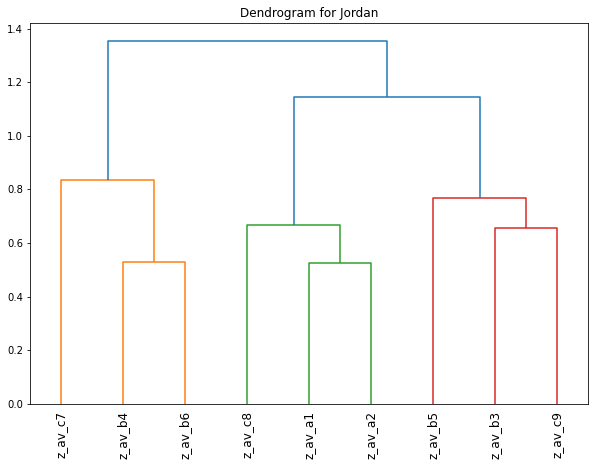

Variable z_av_a1 belongs to cluster 1 for Jordan
Variable z_av_a2 belongs to cluster 1 for Jordan
Variable z_av_b3 belongs to cluster 1 for Jordan
Variable z_av_b4 belongs to cluster 1 for Jordan
Variable z_av_b5 belongs to cluster 1 for Jordan
Variable z_av_b6 belongs to cluster 1 for Jordan
Variable z_av_c7 belongs to cluster 1 for Jordan
Variable z_av_c8 belongs to cluster 1 for Jordan
Variable z_av_c9 belongs to cluster 1 for Jordan


In [9]:
# define the columns to use for clustering
#selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

# subset the data for the Jordan
jordan_data = data[data['country'] == 'Jordan']

# extract the columns to use for clustering
x = jordan_data[selected_columns]

#calculate the correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

#plot a dendrogram of the clustering results
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Jordan")
dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
plt.show()

#choose the distance threshold to define the clusters
dist_threshold = 1.5

#assign cluster labels to each variable based on the distance threshold
cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

#print the cluster labels for each variable
for i, label in enumerate(cluster_labels):
    print(f"Variable {x.columns[i]} belongs to cluster {label} for Jordan")

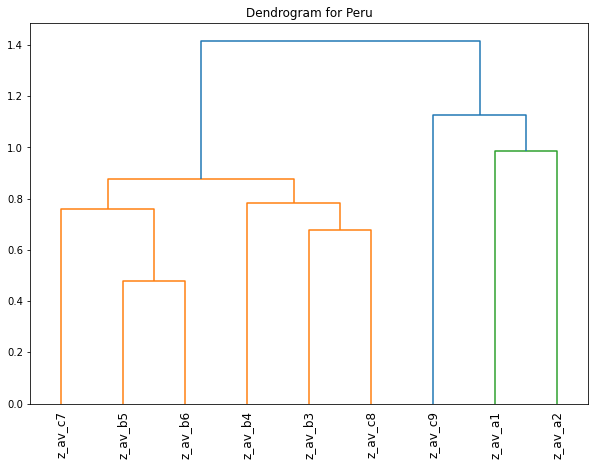

Variable z_av_a1 belongs to cluster 1 for Peru
Variable z_av_a2 belongs to cluster 1 for Peru
Variable z_av_b3 belongs to cluster 1 for Peru
Variable z_av_b4 belongs to cluster 1 for Peru
Variable z_av_b5 belongs to cluster 1 for Peru
Variable z_av_b6 belongs to cluster 1 for Peru
Variable z_av_c7 belongs to cluster 1 for Peru
Variable z_av_c8 belongs to cluster 1 for Peru
Variable z_av_c9 belongs to cluster 1 for Peru


In [10]:
# define the columns to use for clustering
#selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

# subset the data for the Peru
peru_data = data[data['country'] == 'Peru']

# extract the columns to use for clustering
x = peru_data[selected_columns]

#calculate the correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

#plot a dendrogram of the clustering results
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Peru")
dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
plt.show()

#choose the distance threshold to define the clusters
dist_threshold = 1.8

#assign cluster labels to each variable based on the distance threshold
cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

#print the cluster labels for each variable
for i, label in enumerate(cluster_labels):
    print(f"Variable {x.columns[i]} belongs to cluster {label} for Peru")

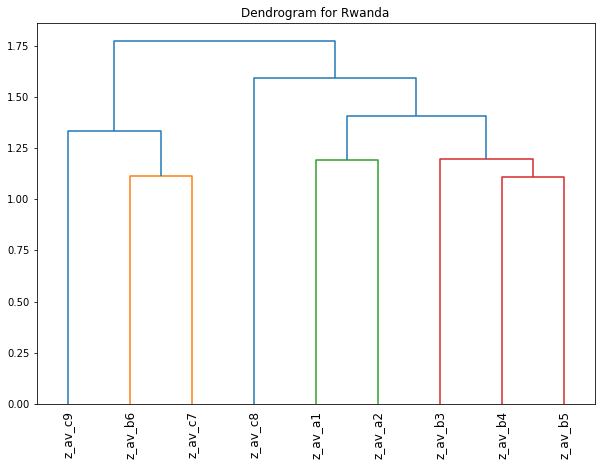

Variable z_av_a1 belongs to cluster 1 for Rwanda
Variable z_av_a2 belongs to cluster 1 for Rwanda
Variable z_av_b3 belongs to cluster 1 for Rwanda
Variable z_av_b4 belongs to cluster 1 for Rwanda
Variable z_av_b5 belongs to cluster 1 for Rwanda
Variable z_av_b6 belongs to cluster 1 for Rwanda
Variable z_av_c7 belongs to cluster 1 for Rwanda
Variable z_av_c8 belongs to cluster 1 for Rwanda
Variable z_av_c9 belongs to cluster 1 for Rwanda


In [11]:
# define the columns to use for clustering
#selected_columns = ['z_av_a1', 'z_av_a2', 'z_av_b3', 'z_av_b4', 'z_av_b5', 'z_av_b6', 'z_av_c7', 'z_av_c8', 'z_av_c9']

# subset the data for the Rwanda
rwanda_data = data[data['country'] == 'Rwanda']

# extract the columns to use for clustering
x = rwanda_data[selected_columns]

#calculate the correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

#plot a dendrogram of the clustering results
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Rwanda")
dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
plt.show()

#choose the distance threshold to define the clusters
dist_threshold = 1.8

#assign cluster labels to each variable based on the distance threshold
cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

#print the cluster labels for each variable
for i, label in enumerate(cluster_labels):
    print(f"Variable {x.columns[i]} belongs to cluster {label} for Rwanda")












.

.

# Hierarchical Clustering for 27 individual behaviors

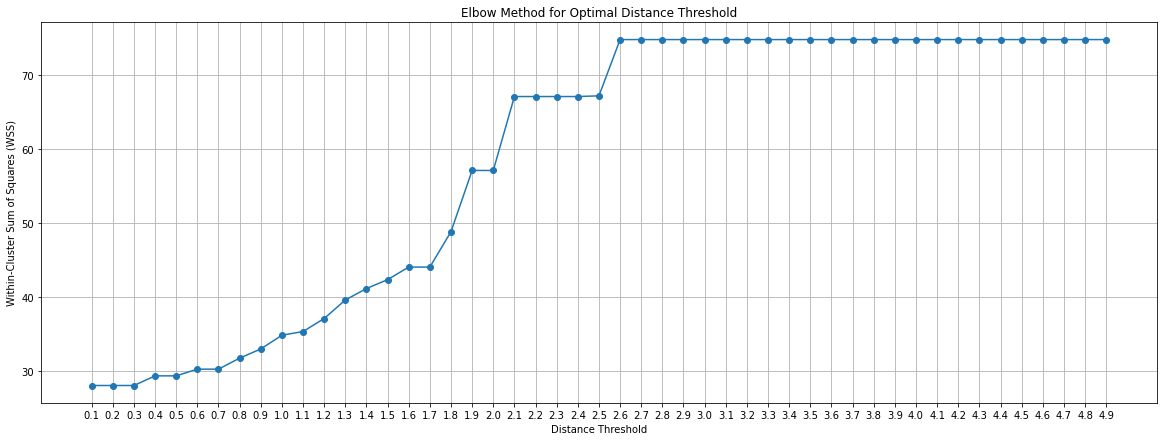

In [12]:
## WSS calculation for optimal distance threshold



# define columns to use for clustering
selected_columns = ['z_av_a1_1', 'z_av_a1_2', 'z_av_a1_3', 'z_av_a1_4', 'z_av_a2_1', 'z_av_a2_2', 'z_av_a2_3', 'z_av_b3_1', 'z_av_b3_2', 'z_av_b3_3', 'z_av_b3_4', 'z_av_b4_1', 'z_av_b4_2', 'z_av_b4_3', 'z_av_b5_1', 'z_av_b5_2', 'z_av_b6_1', 'z_av_b6_2', 'z_av_b6_3', 'z_av_c7_1', 'z_av_c7_2', 'z_av_c7_3', 'z_av_c8_1', 'z_av_c8_2', 'z_av_c8_3', 'z_av_c9_1', 'z_av_c9_2', 'z_av_c9_3']
x = data[selected_columns]

#calculate correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

# calculate WSS for different distance thresholds
wss = []
for i in np.arange(0.1, 5, 0.1):
    cluster_labels = fcluster(linkage_matrix, i, criterion='distance')
    wss.append(sum((corr.columns.to_series().groupby(cluster_labels).apply(lambda x: x.index.tolist())).apply(lambda x: corr.loc[x, x].values.flatten().tolist()).apply(lambda x: sum([abs(e)**2 for e in x]))))

# plot the WSS against different distance thresholds
plt.figure(figsize=(20, 7))
plt.plot(np.arange(0.1, 5, 0.1), wss, marker='o')
plt.title(f'Elbow Method for Optimal Distance Threshold')
plt.xlabel('Distance Threshold')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(np.arange(0.1, 5, 0.1))
plt.grid(True)
plt.show()

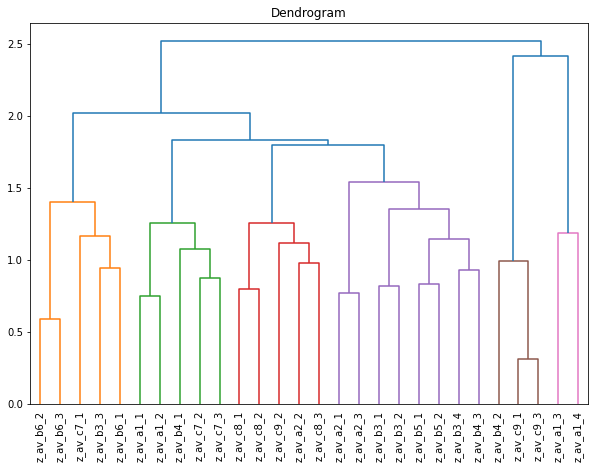

Variable z_av_a1_1 belongs to cluster 1
Variable z_av_a1_2 belongs to cluster 1
Variable z_av_a1_3 belongs to cluster 1
Variable z_av_a1_4 belongs to cluster 1
Variable z_av_a2_1 belongs to cluster 1
Variable z_av_a2_2 belongs to cluster 1
Variable z_av_a2_3 belongs to cluster 1
Variable z_av_b3_1 belongs to cluster 1
Variable z_av_b3_2 belongs to cluster 1
Variable z_av_b3_3 belongs to cluster 1
Variable z_av_b3_4 belongs to cluster 1
Variable z_av_b4_1 belongs to cluster 1
Variable z_av_b4_2 belongs to cluster 1
Variable z_av_b4_3 belongs to cluster 1
Variable z_av_b5_1 belongs to cluster 1
Variable z_av_b5_2 belongs to cluster 1
Variable z_av_b6_1 belongs to cluster 1
Variable z_av_b6_2 belongs to cluster 1
Variable z_av_b6_3 belongs to cluster 1
Variable z_av_c7_1 belongs to cluster 1
Variable z_av_c7_2 belongs to cluster 1
Variable z_av_c7_3 belongs to cluster 1
Variable z_av_c8_1 belongs to cluster 1
Variable z_av_c8_2 belongs to cluster 1
Variable z_av_c8_3 belongs to cluster 1


In [13]:
## Dendrogram for pooled data

#calculate correlation matrix
corr = x.corr()

#perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr, "ward")

#plot a dendrogram of the clustering results
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linkage_matrix, labels=x.columns, leaf_rotation=90, show_leaf_counts=True)
plt.show()



#choose the distance threshold to define the clusters
dist_threshold = 2.6

#assign cluster labels to each variable based on the distance threshold

cluster_labels = fcluster(linkage_matrix, dist_threshold, criterion='distance')

#print the cluster labels for each variable
for i, label in enumerate(cluster_labels):
    print(f"Variable {x.columns[i]} belongs to cluster {label}")